# Juliaで信号処理の練習
## State variable filter
ControlSystems.jlを使用

In [2]:
using Plots
using ControlSystems
pyplot()

Plots.PyPlotBackend()

In [3]:
struct StateVariableFilter
    lpf::StateSpace
    bpf::StateSpace
    hpf::StateSpace

    function StateVariableFilter(ωc::Real, Q::Real)
        A = [0 ωc;
            -ωc -ωc/Q]
        B = [0;
            ωc]
        lpf = ss(A, B, [1 0], [0])
        bpf = ss(A, B, [0 1], [0])
        hpf = ss(A, B, [-1 -1/Q], [1])
        return new(lpf, bpf, hpf)
    end
end

In [4]:
ωc = 2π*800
@show ωc
Q = 1/√2    #バターワース
svf = StateVariableFilter(ωc, Q)

ωc = 5026.548245743669


StateVariableFilter(StateSpace:
A = 
             x1         x2 
  x1       0.0     5026.55 
  x2   -5026.55   -7108.61 
B = 
            u1 
  x1      0.0  
  x2   5026.55 
C = 
         x1     x2 
  y1   1.0    0.0  
D = 
         u1 
  y1   0.0  

Continuous-time state-space model, StateSpace:
A = 
             x1         x2 
  x1       0.0     5026.55 
  x2   -5026.55   -7108.61 
B = 
            u1 
  x1      0.0  
  x2   5026.55 
C = 
         x1     x2 
  y1   0.0    1.0  
D = 
         u1 
  y1   0.0  

Continuous-time state-space model, StateSpace:
A = 
             x1         x2 
  x1       0.0     5026.55 
  x2   -5026.55   -7108.61 
B = 
            u1 
  x1      0.0  
  x2   5026.55 
C = 
          x1      x2   
  y1   -1.0    -1.41421
D = 
         u1 
  y1   1.0  

Continuous-time state-space model)


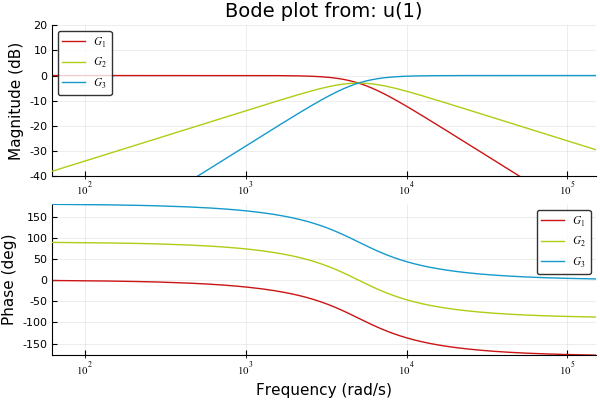

In [5]:
#伝達関数
Glp = ss2tf(svf.lpf)
Gbp = ss2tf(svf.bpf)
Ghp = ss2tf(svf.hpf)

bodeplot([Glp, Gbp, Ghp], 2π*linspace(10, 24000, 2000))
plot!(subplot=1, ylim=(-40, 20))

In [6]:
Q = 4.0
svf = StateVariableFilter(ωc, Q)

StateVariableFilter(StateSpace:
A = 
             x1         x2 
  x1       0.0     5026.55 
  x2   -5026.55   -1256.64 
B = 
            u1 
  x1      0.0  
  x2   5026.55 
C = 
         x1     x2 
  y1   1.0    0.0  
D = 
         u1 
  y1   0.0  

Continuous-time state-space model, StateSpace:
A = 
             x1         x2 
  x1       0.0     5026.55 
  x2   -5026.55   -1256.64 
B = 
            u1 
  x1      0.0  
  x2   5026.55 
C = 
         x1     x2 
  y1   0.0    1.0  
D = 
         u1 
  y1   0.0  

Continuous-time state-space model, StateSpace:
A = 
             x1         x2 
  x1       0.0     5026.55 
  x2   -5026.55   -1256.64 
B = 
            u1 
  x1      0.0  
  x2   5026.55 
C = 
          x1      x2 
  y1   -1.0    -0.25 
D = 
         u1 
  y1   1.0  

Continuous-time state-space model)


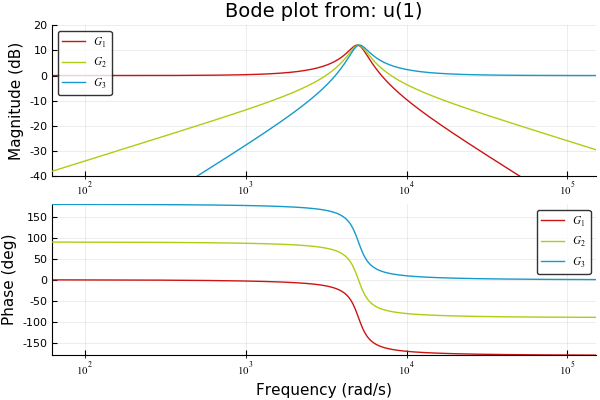

In [7]:
Glp = ss2tf(svf.lpf)
Gbp = ss2tf(svf.bpf)
Ghp = ss2tf(svf.hpf)

bodeplot([Glp, Gbp, Ghp], 2π*linspace(10, 24000, 2000))
plot!(subplot=1, ylim=(-40, 20))